<a href="https://colab.research.google.com/github/Sharaffin/Credit-card-default-prediction/blob/main/credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# 1. **Connection with the Data**
Here, we are provided with a dataset with 30000 customers. 
At first, we import the libraries or functions for making our analysis easy and then get connected to the set of outcomes.

In [1]:
# Taking help of the Following Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#Creating a path in drive
path = '/content/drive/MyDrive/'

In [4]:
#reading the dataset 
df = pd.read_csv(path + 'default of credit card clients.csv', encoding='latin-1')

# **2. Deeper Understanding of the Data**
As there is a huge no. of experiences, we take the help of statistics to measure each and every features in different dimensions and thus step by step, we find the most important features or the exact way to decode the experiences.

**“what gets measured gets done“.**

In [5]:
#first five observations
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
#last five observations
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [7]:
#To get the Rows and Columns in the dataset
df.shape

(30000, 25)

In [8]:
#information about the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [9]:
#description about the dataset
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


There are 30,000 distinct credit card clients.

The average value for the amount of credit card limit is 167,484 with max value being 10 lakhs.

The average age is 35

Education Level is mostly graduate school and university.

Most of the clients are either married or single

In [10]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [11]:
#Checking missing values in each column
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [12]:
# Understand the data by checking the first row
df.loc[0]

ID                                1.0
LIMIT_BAL                     20000.0
SEX                               2.0
EDUCATION                         2.0
MARRIAGE                          1.0
AGE                              24.0
PAY_0                             2.0
PAY_2                             2.0
PAY_3                            -1.0
PAY_4                            -1.0
PAY_5                            -2.0
PAY_6                            -2.0
BILL_AMT1                      3913.0
BILL_AMT2                      3102.0
BILL_AMT3                       689.0
BILL_AMT4                         0.0
BILL_AMT5                         0.0
BILL_AMT6                         0.0
PAY_AMT1                          0.0
PAY_AMT2                        689.0
PAY_AMT3                          0.0
PAY_AMT4                          0.0
PAY_AMT5                          0.0
PAY_AMT6                          0.0
default.payment.next.month        1.0
Name: 0, dtype: float64

In [13]:
# Get the proportion of customers who had default payment in the next month (Oct.2005) 
# About 22% customers had default payment next month

df['default.payment.next.month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

# **3. Data Cleaning**
**3.1  Check missing values, column type and column names**

There is no missing value, all columns have the correct type, and most columns are named consistently. 






In [14]:
# percentage of missing values in our dataset
missing_values = (((df.isnull().sum()).sum())/df.size)*100
missing_values

0.0

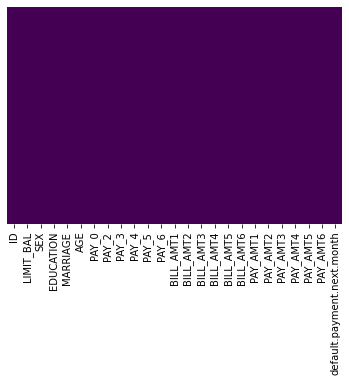

In [15]:
#Heatmap for Null values check in cleaned database 
sns.heatmap(df.isnull() , yticklabels=False , cbar=False , cmap='viridis')

In [16]:
# Checking column names, column data type and indentify any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [17]:
# Changing column names "PAY_0" to 'PAY_1' for order

df.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'DEF_PAY'},inplace = True)
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEF_PAY'],
      dtype='object')

# **3.2 Check duplicate records**

There are no duplicate IDs or rows.

In [18]:
# Check if there is any duplicate IDs In Dataset
condition = bool(df.duplicated(subset = 'ID').any())

if condition:
    print('There are duplicate IDs')
else:
    print('No duplicate IDs')

No duplicate IDs


# 3.3 Identifying Outliers in the dataset

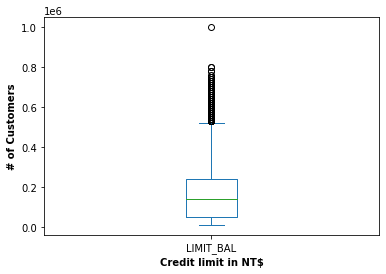

In [19]:
# Using boxplot to identify any outlier in credit limit

df["LIMIT_BAL"].plot(kind="box")
plt.xlabel('Credit limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

In [20]:
# Taking a close look at the outlier with a value of 1 MILLION NT DOLLARS
# The observations from other columns indicate that this was just ONE CUSTOMER who has an excellent payment history
# Therefore it should be considered as a valid data

outliers = df.loc[df['LIMIT_BAL']>900000]
outliers

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
2197,2198,1000000.0,2,1,1,47,0,0,0,-1,...,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0


# **3.4 Check categorical columns**
Next, we will check these 3 columns: SEX', 'EDUCATION' and 'MARRIAGE'. The 'SEX' column looks good, while 'EDUCATION' and 'MARRIAGE' columns have some unregulated data and 'EDUCATION' column has duplicated values in different codes.

In [21]:
categorical_data = []
for i in df.columns:
  if len(df[i].unique()) <= 15:
    categorical_data.append(i)


In [22]:
categorical_data


['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'DEF_PAY']

In [23]:
# statistics for these columns
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [24]:
# Get the total counts of each EDUCATION level
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [25]:
df['EDUCATION']=np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])

In [26]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

The MARRAIGE column also has an undocumented '0' value, so we'll do the same and reassign it as '3' for 'other'. It's safe to do this because 'other' could stand for 'divorced' or another type of relationship status.

In [27]:
# fixing 'MARRIAGE' column by putting unknown variables in 'other' category (3)
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3

In [28]:
#total counts after replacing 0 with 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [29]:
#Get SEX column's distribution. 1: male; 2: female
df['SEX'].value_counts(dropna=False)

2    18112
1    11888
Name: SEX, dtype: int64

## **3.5 Check Numerical Data**

In [30]:
numerical_data = []
for i in df.columns:
  if len(df[i].unique()) > 15:
    numerical_data.append(i)

In [31]:
numerical_data

['ID',
 'LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

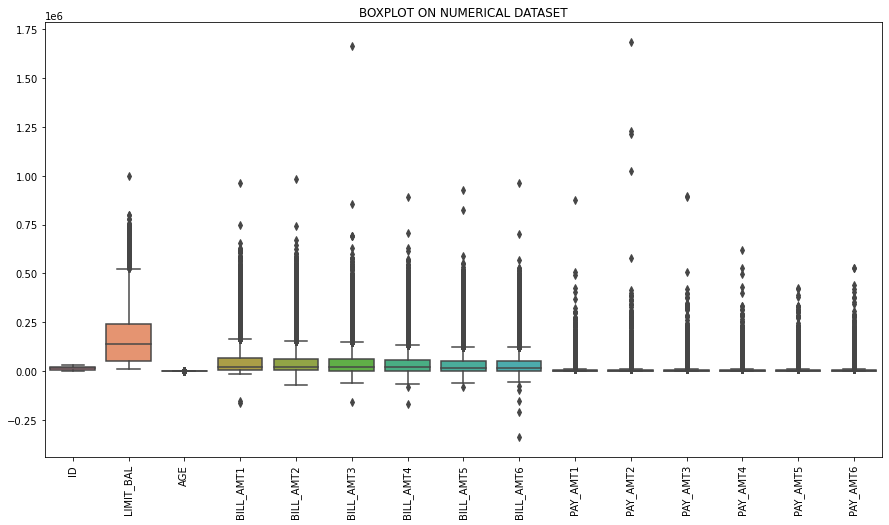

In [32]:
# Box plot on Numerical Dataset 
plt.figure(figsize=(15, 8))
sns.boxplot(data = df[numerical_data])
plt.xticks(rotation = "vertical")
plt.title("BOXPLOT ON NUMERICAL DATASET")
plt.show()

# **4. Exploratory Data Analysis and Data Visualization**

When we know all the important features of our experiences, we can go a step ahead by finding the relationship among features. Here, we take the help of visualization because

**"A picture is worth a thousand words"**

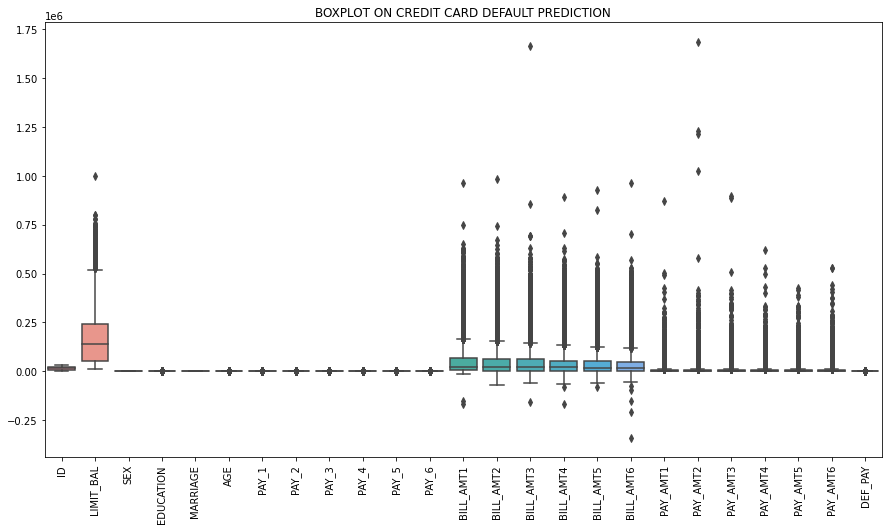

In [33]:
#boxplot on credit card 
plt.figure(figsize=(15, 8))
sns.boxplot(data = df)
plt.xticks(rotation = "vertical")
plt.title("BOXPLOT ON CREDIT CARD DEFAULT PREDICTION")
plt.show()

In [34]:
# Create a new column "HAS_DEF" to indicate customers who have at least 1 deafult payment from PAY_1 to Pay_6
# 0 : no default ; 1: has default

def_condition = (df.PAY_1 >1) | (df.PAY_2 >1) | (df.PAY_3 >1) | (df.PAY_4 >1) | (df.PAY_5 >1) | (df.PAY_6 >1)
df.loc[def_condition, "HAS_DEF"] = 1
df.loc[df.HAS_DEF.isna(), "HAS_DEF"] = 0

df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEF_PAY',
       'HAS_DEF'],
      dtype='object')

# **4.1 Is the proportion of defaults the same for men and women?**

In [35]:
default_sex_crosstab = pd.crosstab(df['HAS_DEF'],df['SEX'],margins=True,normalize=False)

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }

# SEX: 
# 1 = male; 2 = female
new_columns = {1 : 'Male', 2 : 'Female'}

default_sex_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
default_sex_crosstab

SEX,Male,Female,All
HAS_DEF,,,
Non-default,8291,13329,21620
Default,3597,4783,8380
All,11888,18112,30000


In [36]:
default_sex_crosstab_norm =  default_sex_crosstab / default_sex_crosstab.loc['All']
default_sex_crosstab_norm

SEX,Male,Female,All
HAS_DEF,,,
Non-default,0.697426,0.735921,0.720667
Default,0.302574,0.264079,0.279333
All,1.000000,1.000000,1.000000


The data set contains 11888 males and 18112 females.
30% male have default payment while 26% female have default payment
The proportion of defaults for men is slightly higher than the proportion of defaults for women. However, this difference appears to be small and may not be statistically significant.





# **4.2 Did customers with higher education have less number of delayed payment?**

In [37]:
# Create a table of 
# education (Graduate school / University / High school /Others) and
# default status (default / non-default)

default_edu_crosstab = pd.crosstab(df['HAS_DEF'], 
                                   df['EDUCATION'], 
                                   margins=True,
                                   normalize=False)

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }

# EDUCATION: 
# 1 = graduate school; 2 = university; 3 = high school; 4 = others.
new_columns = {1 : 'Graduate school', 
               2 : 'University', 
               3 : 'High school', 
               4 : 'Others'}

default_edu_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
default_edu_crosstab

EDUCATION,Graduate school,University,High school,Others,All
HAS_DEF,,,,,
Non-default,8205,9727,3271,417,21620
Default,2380,4303,1646,51,8380
All,10585,14030,4917,468,30000


In [38]:
# Normalize the contingency table columns
# by dividing each column by the column's total.

default_edu_crosstab_norm =  default_edu_crosstab / default_edu_crosstab.loc['All']
default_edu_crosstab_norm

EDUCATION,Graduate school,University,High school,Others,All
HAS_DEF,,,,,
Non-default,0.775154,0.6933,0.665243,0.891026,0.720667
Default,0.224846,0.3067,0.334757,0.108974,0.279333
All,1.000000,1.0000,1.000000,1.000000,1.000000


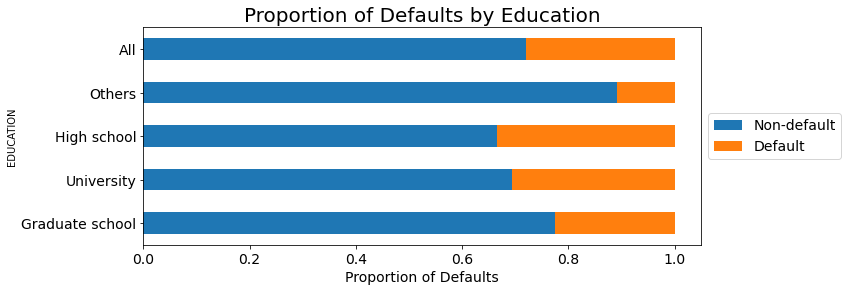

In [39]:
# Plot the proportion of defaults by level of education, showing:
#   1. the proportion of defaults for individuals with high school education;
#   2. the proportion of defaults for individuals with university education;
#   3. the proportion of defaults for individuals with graduate school education;
#   4. the proportion of defaults for individuals categorized as 'others';
#   5. the proportion of defaults for the entire data set.

fig, ax = plt.subplots(1, 1)
default_edu_crosstab_norm[0:2].T.plot.barh(stacked=True,figsize=(10,4),fontsize=14,                        
                                           ax=ax)

lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)
plt.title('Proportion of Defaults by Education', fontsize=20)
plt.xlabel('Proportion of Defaults', fontsize=14)


plt.show()

The proportion of defaults seems to decrease as the level of education increases.Customers with high school and university educational level had higher default proportions than customers with grad school education.
More number of credit holders are university students followed by Graduates and then High school students


# **4.3 Did customers with a higher education level get higher credit limits?**



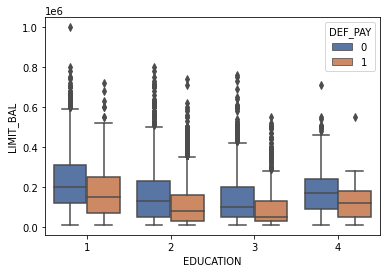

In [40]:

# boxplot to visualize credit limit grouped by education level
sns.boxplot(x='EDUCATION',hue='DEF_PAY', y='LIMIT_BAL',data=df,palette="deep")

clients who have lower than high school level education tend to have default payment more.

#4.4)Does age has any relation with Credit Limit and Default Payments 

In [41]:
df[(df['AGE']>60)].shape # There are around 272 senior citizens in given data set


(272, 26)

In [42]:
#4.2) to check if age has any relation with target(defaulting loan or not!)
def conv(x):
    if x>20 and x<=40:
        return 'Adult'
    elif x>40 and x<60:
        return 'Middle Age'
    else:
        return 'Senior citizen'
df['NEWAGE']=df['AGE'].apply(conv)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


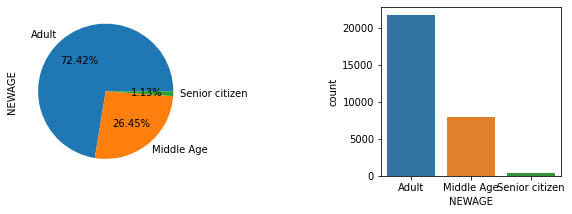

In [43]:
# df['NEWAGE'].value_counts().plot(kind='pie',autopct='%1.2f%%')
# plt.show()
# sns.countplot(df['NEWAGE']) 
# plt.show()

fig,axes=plt.subplots(1,2,figsize=(10,5))
df['NEWAGE'].value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axes[0])
sns.countplot(df['NEWAGE'],ax=axes[1])
fig.tight_layout(pad=8)
plt.show()



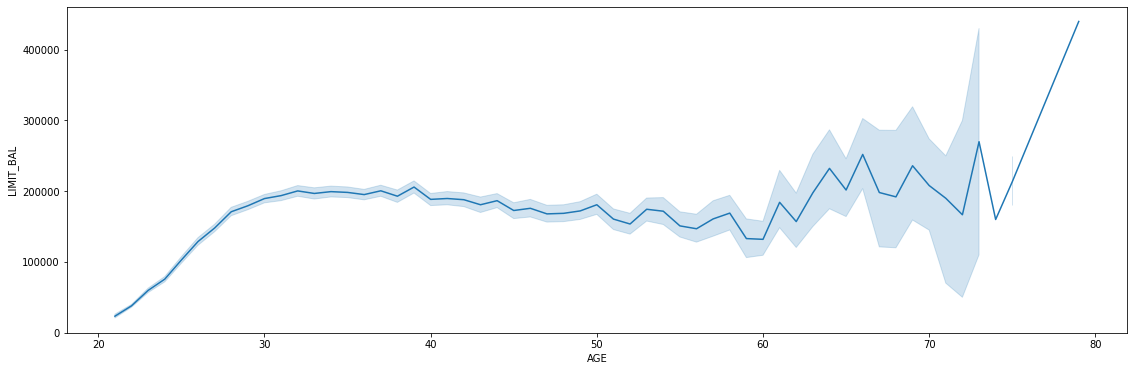

In [44]:
#line graph for Age and Credit Limit 
plt.figure(figsize = (19,6))
sns.lineplot(data= df, x="AGE", y="LIMIT_BAL")
plt.show()

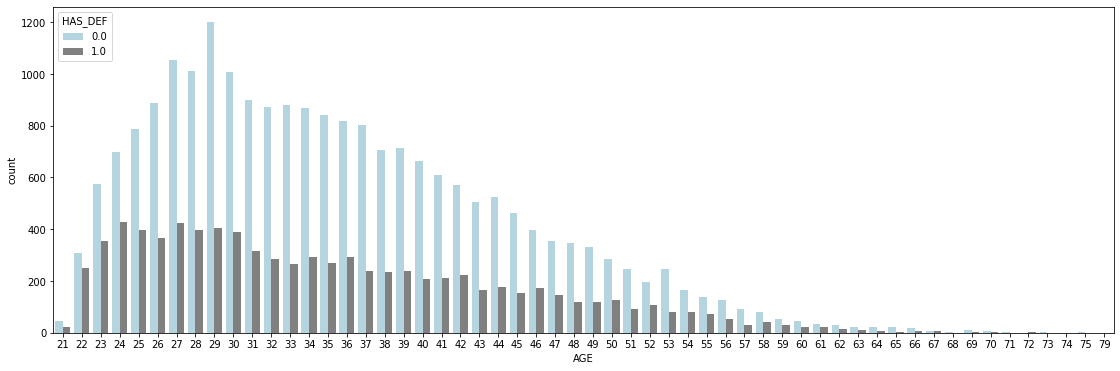

In [45]:
#Countplot of defaults and non defaults with respect to AGE
plt.figure(figsize = (19,6))
sns.countplot(x = "AGE" , data = df, palette = ["lightblue", "grey"], hue = "HAS_DEF")
plt.show()

There are more adults as compared to old people above 40 and below 60

There are very low senior citizens

Customers aged between 30-50 had the lowest delayed payment rate, while younger groups (20-30) and older groups (50-70) all had higher delayed payment rates. However, the delayed rate dropped slightly again in customers older than 70 years.

# **4.5 Has the repayment status changed in the 6 month from April 2005 (PAY_6) to September 2005(PAY_1)?**



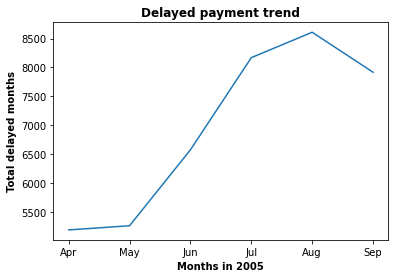

In [46]:

#A dataframe with the records that have default

has_default  = df[df['HAS_DEF']== 1]
default_trend = has_default[['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0)

# Draw a line chart to show the trend. The lower the number, the shorter delayed payment
fig,ax = plt.subplots()
ax.plot(default_trend)
plt.xticks(['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total delayed months',fontweight='bold')
plt.title('Delayed payment trend',fontweight='bold')

plt.show()

There was a huge jump from May,2005 (PAY_5) to July, 2005 (PAY_3) when delayed payment increased significantly, then it peaked at August, 2005 (PAY_2), things started to get better in September, 2005 (PAY_1).

# **4.6 Distribution of credit limit to customers**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


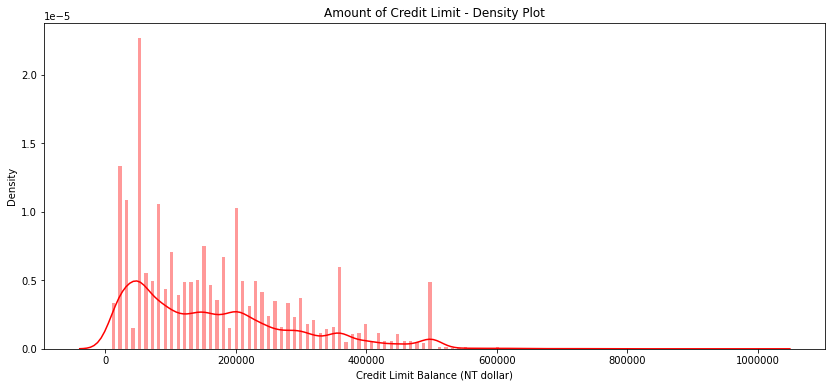

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


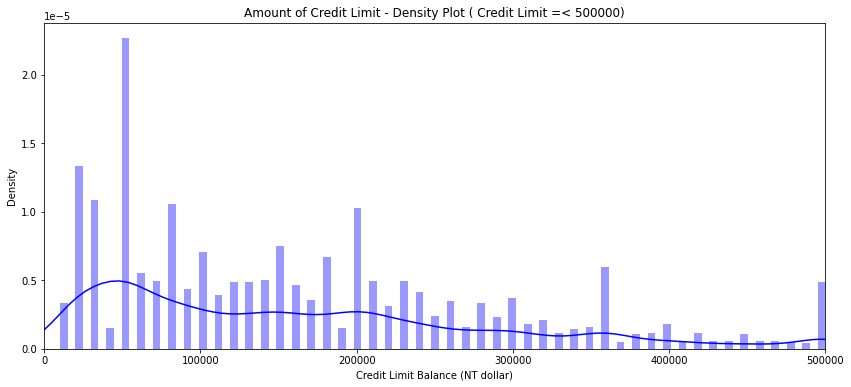

In [47]:
# Amount of credit limit

plt.figure(figsize = (14,6))
plt.title('Amount of Credit Limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(df["LIMIT_BAL"],kde=True,bins=200, color="red")
plt.xlabel('Credit Limit Balance (NT dollar)')
plt.ticklabel_format(axis='x',scilimits = (0,1000000))
plt.show()

# Closer look to the amount of credit limit (exclude outliers ie 1000000)

plt.figure(figsize = (14,6))
plt.title('Amount of Credit Limit - Density Plot ( Credit Limit =< 500000)')
#sns.set_color_codes("pastel")
sns.distplot(df["LIMIT_BAL"],kde=True,bins=200, color="blue")
plt.xlabel('Credit Limit Balance (NT dollar)')
plt.ticklabel_format(axis='x',scilimits = (0,500000))
plt.xlim(0,500000) 
plt.show()

In [48]:
df['LIMIT_BAL'].value_counts().head(5)

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: LIMIT_BAL, dtype: int64

the credit limit of customers are usually lower than 2,00,000 TWD. Credit limit at 50,000 TWD has the highest density among all the credit limit levels, followed by 20,000 TWD credit limit. 2,00,000 TWD credit limit reaches another peak after the credit limit at 80,000 TWD

# **4.7 Correlation Matrix - HEATMAP**

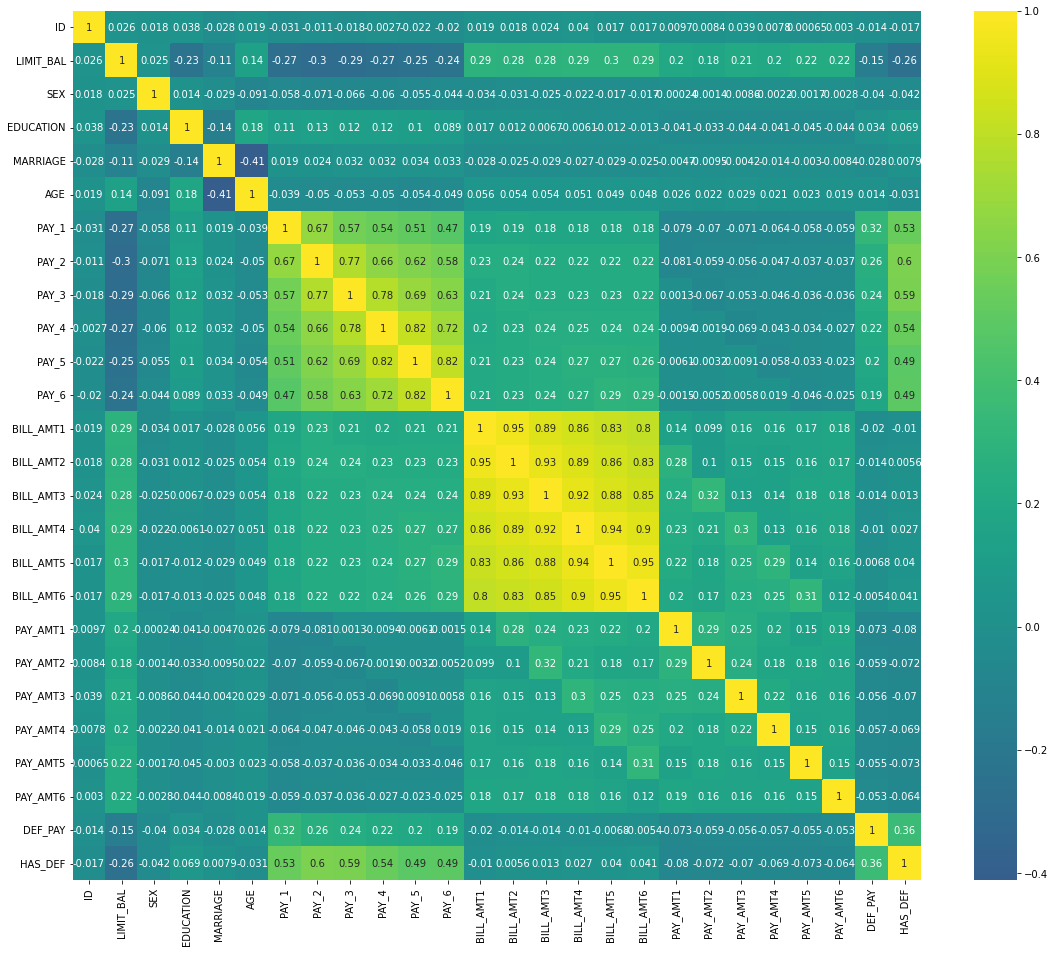

In [49]:
#Correlation Matrix - HEATMAP
plt.figure(figsize=(19,16))
sns.heatmap(df.corr(),annot=True,center = 0 , cmap ='viridis')
plt.show()

The variable "age" is inversely correlated with "Marraige".


An interesting finding is that the bill amounts from April to September are highly positively correlated.

Multicollinearity exists between the payment status variables.

Moreover, the bill amounts of each month are weakly positively correlated or even NOT correlated to the payment amount of the same month, meaning that the customers are not paying the exact amount of their bills.

The payment status(PAY_1 TO PAY_6) and credit limit(LIMIT_BAL) are negatively correlated, i.e. the later the repayment, the lower the credit limit.

The credit limit is inversely correlated with the customer having a default payment next month.

# **4.8 Bivariate Analysis**

In [50]:
#bivariate Analysis 
cateogical_data = []
for i in df.columns:
  if len(df[i].unique()) <= 15:
    cateogical_data.append(i)


In [51]:
cateogical_data

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'DEF_PAY',
 'HAS_DEF',
 'NEWAGE']

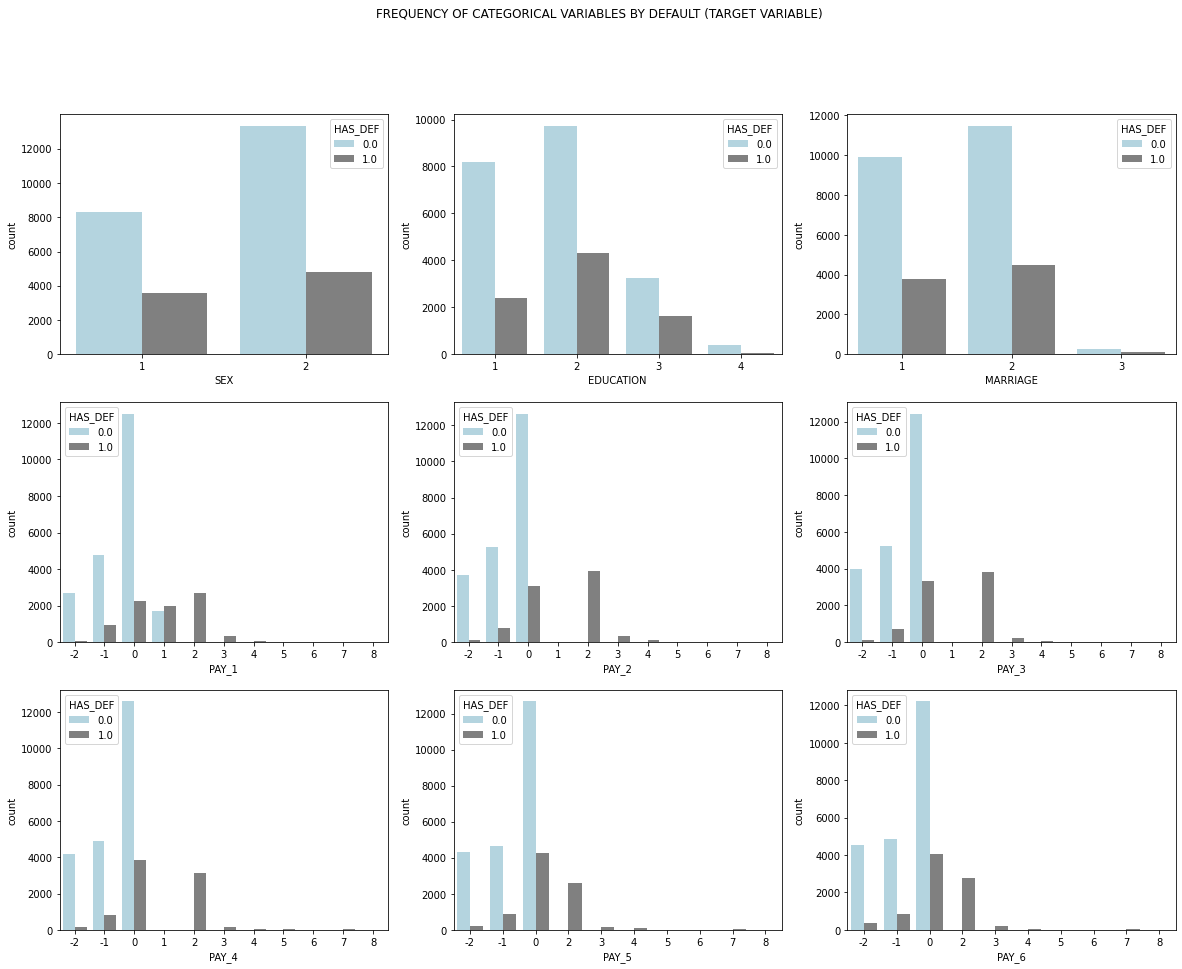

In [52]:

fig, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
fig.suptitle('FREQUENCY OF CATEGORICAL VARIABLES BY DEFAULT (TARGET VARIABLE)')
sns.countplot(x = df[cateogical_data[0]], data = df, hue = df["HAS_DEF"], ax=axes[0,0], palette = ["lightblue", "grey"])
sns.countplot(x = df[cateogical_data[1]], data = df, hue = df["HAS_DEF"], ax=axes[0,1], palette = ["lightblue", "grey"])
sns.countplot(x = df[cateogical_data[2]], data = df, hue = df["HAS_DEF"], ax=axes[0,2], palette = ["lightblue", "grey"])
sns.countplot(x = df[cateogical_data[3]], data = df, hue = df["HAS_DEF"], ax=axes[1,0], palette = ["lightblue", "grey"])
sns.countplot(x = df[cateogical_data[4]], data = df, hue = df["HAS_DEF"], ax=axes[1,1], palette = ["lightblue", "grey"])
sns.countplot(x = df[cateogical_data[5]], data = df, hue = df["HAS_DEF"], ax=axes[1,2], palette = ["lightblue", "grey"])
sns.countplot(x = df[cateogical_data[6]], data = df, hue = df["HAS_DEF"], ax=axes[2,0], palette = ["lightblue", "grey"])
sns.countplot(x = df[cateogical_data[7]], data = df, hue = df["HAS_DEF"], ax=axes[2,1], palette = ["lightblue", "grey"])
sns.countplot(x = df[cateogical_data[8]], data = df, hue = df["HAS_DEF"], ax=axes[2,2], palette = ["lightblue", "grey"])
plt.show()

Male customers have more number of default payments than female customers.

There is NO significant difference in the proportion of default payment across differenct education levels. But clients who have lower than high school level eductation tend to have default payment more.

Married clients have a higher default payment rate than single or other marital status clients.

People who have the payment delay for two months have a high ratio of default next month (October). In September, a quarter of customers who repay one month later have default payment next month in October. This situation does not exist in other months as almost no one repay one month later.

## **5.Splitting Dataset into Training(80%) and Test Set(20%)**

In [ ]:
#using MinMaxScaler to normalize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#functions to calculate mean and std deviation
scaler.fit(X)
X = scaler.transform(X)

5.1 LOGISTIC REGRESSION 

In [ ]:
#importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# Splitting the data test into train 80% and test 20%.
# X_train, Y_train are training data and labels respectively 
# X_test, Y_test are testing data and labels respectively 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,stratify=  Y, train_size = 0.8, random_state=2)

In [ ]:
#Making the logistic regression model
LR = LogisticRegression()
#Training the model on the training data and labels
LR.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# Using the model to predict the labels of the test data
y_pred= LR.predict(X_test)


In [ ]:
# predicting the training set
train_class_preds = LR.predict(X_train)

In [ ]:
# Evaluating the accuracy of the model using the sklearn functions
#importing the functions 
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [ ]:
# Printing the results
print("Accuracy on train data: " ,accuracy_score(train_class_preds,Y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score(Y_test, y_pred))
print("Recall:",recall_score(Y_test, y_pred))

Accuracy on train data:  0.81025
Accuracy on test data: 0.8088333333333333
Precision: 0.7163461538461539
Recall: 0.22456669178598343


GRID SEARCH 

In [ ]:
#Import the library - GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
#Initializing an object
grid = GridSearchCV

In [ ]:
#for handling penalities 
lr_model = grid(LR,
                param_grid = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
'penalty' : ['l2'],
'C' : [1.0, 0.1, 0.01]}, cv = 3 , verbose = 1)

In [ ]:
#Training the model on the training data and labels
lr_model.fit(X_train, Y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [ ]:
#hyperparameter values 
lr_model.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
#to refit a final model to the full training set using the optimal hyperparameter values found
lr_model = lr_model.best_estimator_

In [ ]:
#Using the model to predict the labels of the test data
y_pred = lr_model.predict(X_test)

In [ ]:
#printing the results 
print("Accuracy on train data: " ,accuracy_score(train_class_preds,Y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score(Y_test, y_pred))
print("Recall:",recall_score(Y_test, y_pred))

Accuracy: 0.8078333333333333
Precision: 0.6933333333333334
Recall: 0.2351168048229088


SUPPORT VECTOR CLASSIFICATION

In [ ]:
## Fitting SVM to the Training set
from sklearn.svm import SVC

In [ ]:
svc = SVC(gamma="scale")

In [ ]:
svc.fit(X_train, Y_train)

SVC()

In [ ]:
# Predicting the Test set results
y_pred = svc.predict(X_test)

In [ ]:
#printing the results
print("Accuracy on train data: "accuracy_score(train_class_preds,y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score(Y_test, y_pred))
print("Recall:",recall_score(Y_test, y_pred))

Accuracy: 0.8153333333333334
Precision: 0.6661608497723824
Recall: 0.3308214016578749


In [ ]:
#defining Parameter range
svc_model = GridSearchCV(SVC(), param_grid= {'kernel':['poly', 'rbf'],'C':[1.0, 0.1, 0.01],'gamma':[ 'auto']}, cv= 2, verbose= 1)

In [ ]:
# fitting the model for grid search
svc_model.fit(X_train, Y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1.0, 0.1, 0.01], 'gamma': ['auto'],
                         'kernel': ['poly', 'rbf']},
             verbose=1)

In [ ]:
# print best parameter after tuning
svc_model.best_params_

{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}

In [ ]:
# print how the model looks after hyper-parameter tuning
svc_model = svc_model.best_estimator_

In [ ]:
#predictions 
y_pred = svc_model.predict(X_test)

In [ ]:
#Printing the results 
print("Accuracy on train data: ",accuracy_score(train_class_preds,y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score(Y_test, y_pred))
print("Recall:",recall_score(Y_test, y_pred))

Accuracy: 0.7886666666666666
Precision: 0.7322834645669292
Recall: 0.07008289374529013


BAGGING CLASSIFIER 

In [ ]:
#importing libraries for BaggingClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
#instantiation 
bc = BaggingClassifier()


In [ ]:
bc.fit(X_train, Y_train)

BaggingClassifier()

In [ ]:
y_pred = bc.predict(X_test)

In [ ]:
print("Accuracy on train data: "accuracy_score(train_class_preds,y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score(Y_test, y_pred))
print("Recall:",recall_score(Y_test, y_pred))

Accuracy: 0.7996666666666666
Precision: 0.5836680053547524
Recall: 0.3285606631499623


In [ ]:
bc_model = GridSearchCV(bc, param_grid= {'n_estimators':[45,50, 65]}, verbose = 1 , cv = 3)

In [ ]:
bc_model.fit(X_train, Y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=BaggingClassifier(),
             param_grid={'n_estimators': [45, 50, 65]}, verbose=1)

In [ ]:
bc_model.best_params_

{'n_estimators': 45}

In [ ]:
bc_model = bc_model.best_estimator_

In [ ]:
bc_model.fit(X_train, Y_train)

BaggingClassifier(n_estimators=45)

In [ ]:
y_pred = bc_model.predict(X_test)

In [ ]:
print("Accuracy on train data: "accuracy_score(train_class_preds,y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score(Y_test, y_pred))
print("Recall:",recall_score(Y_test, y_pred))

Accuracy: 0.8125
Precision: 0.6268844221105527
Recall: 0.3760361718161266


RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print("Accuracy on train data: "accuracy_score(train_class_preds,y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score(Y_test, y_pred))
print("Recall:",recall_score(Y_test, y_pred))

Accuracy: 0.8126666666666666
Precision: 0.6313065976714101
Recall: 0.3677467972871138


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
rfc_model = GridSearchCV(rfc, param_grid = dict(n_estimators = [10, 100, 1000]), cv = 3, verbose= 1)

In [ ]:
rfc_model.fit(X_train, Y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 100, 1000]}, verbose=1)

In [ ]:
rfc_model.best_params_

{'n_estimators': 1000}

In [ ]:
rfc_model = rfc_model.best_estimator_

In [ ]:
rfc_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
y_pred = rfc_model.predict(X_test)

In [ ]:
print("Accuracy on train data: "accuracy_score(train_class_preds,y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score(Y_test, y_pred))
print("Recall:",recall_score(Y_test, y_pred))

Accuracy: 0.8135
Precision: 0.6357702349869452
Recall: 0.36699321778447624


GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train, Y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = gbc.predict(X_test)

In [ ]:
print("Accuracy on train data: "accuracy_score(train_class_preds,y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score(Y_test, y_pred))
print("Recall:",recall_score(Y_test, y_pred))

Accuracy: 0.8186666666666667
Precision: 0.6662030598052852
Recall: 0.36096458176337604


In [ ]:
gbc_model = GridSearchCV(gbc, param_grid = dict(n_estimators = [10, 50],
learning_rate = [0.001, 0.01, 0.1],
subsample = [0.5, 0.7, 1.0],
max_depth = [3, 7, 9]) , cv= 3, verbose= 2)

In [ ]:
gbc_model.fit(X_train, Y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=10, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=50, subsample=0.5; total time=   1.8

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 7, 9], 'n_estimators': [10, 50],
                         'subsample': [0.5, 0.7, 1.0]},
             verbose=2)

In [ ]:
gbc_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.5}

In [ ]:
gbc_model = gbc_model.best_estimator_

In [ ]:
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=50, subsample=0.5)

In [ ]:
y_pred = gbc_model.predict(X_test)

In [ ]:
print("Accuracy on train data: "accuracy_score(train_class_preds,y_train))
print("Accuracy on test data:",accuracy_score(Y_test, y_pred))
print("Precision:",precision_score( Y_test, y_pred))
print("Recall:",recall_score(Y_test ,y_pred))

Accuracy: 0.8186666666666667
Precision: 0.665742024965326
Recall: 0.3617181612660136


XG BOOST

In [ ]:
from xgboost import  XGBClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify = Y)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=140, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [ ]:
 gsearch1.best_score_

0.8215833333333333

In [ ]:
optimal_xgb = gsearch1.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.827
The accuracy on test data is  0.8193333333333334


In [ ]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)


print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)


The accuracy on test data is  0.8193333333333334
The precision on test data is  0.36096458176337604
The recall on test data is  0.66993006993007
